In [23]:
import pandas as pd
from predict import predict
import matplotlib.pyplot as plt

Below, we will load the test dataset and show the first 5 rows: 

In [24]:
test = pd.read_csv('student_data.csv', index_col='Student ID')
test.head()

,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
Student ID,,,,,,,,
0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0


In [25]:
y_col = ['Good Candidate'] 
X_cols = list(test.columns)
X_cols.remove('Good Candidate')

y = test[y_col] 
X = test[X_cols]

Below we will visualize the categorical variables: 

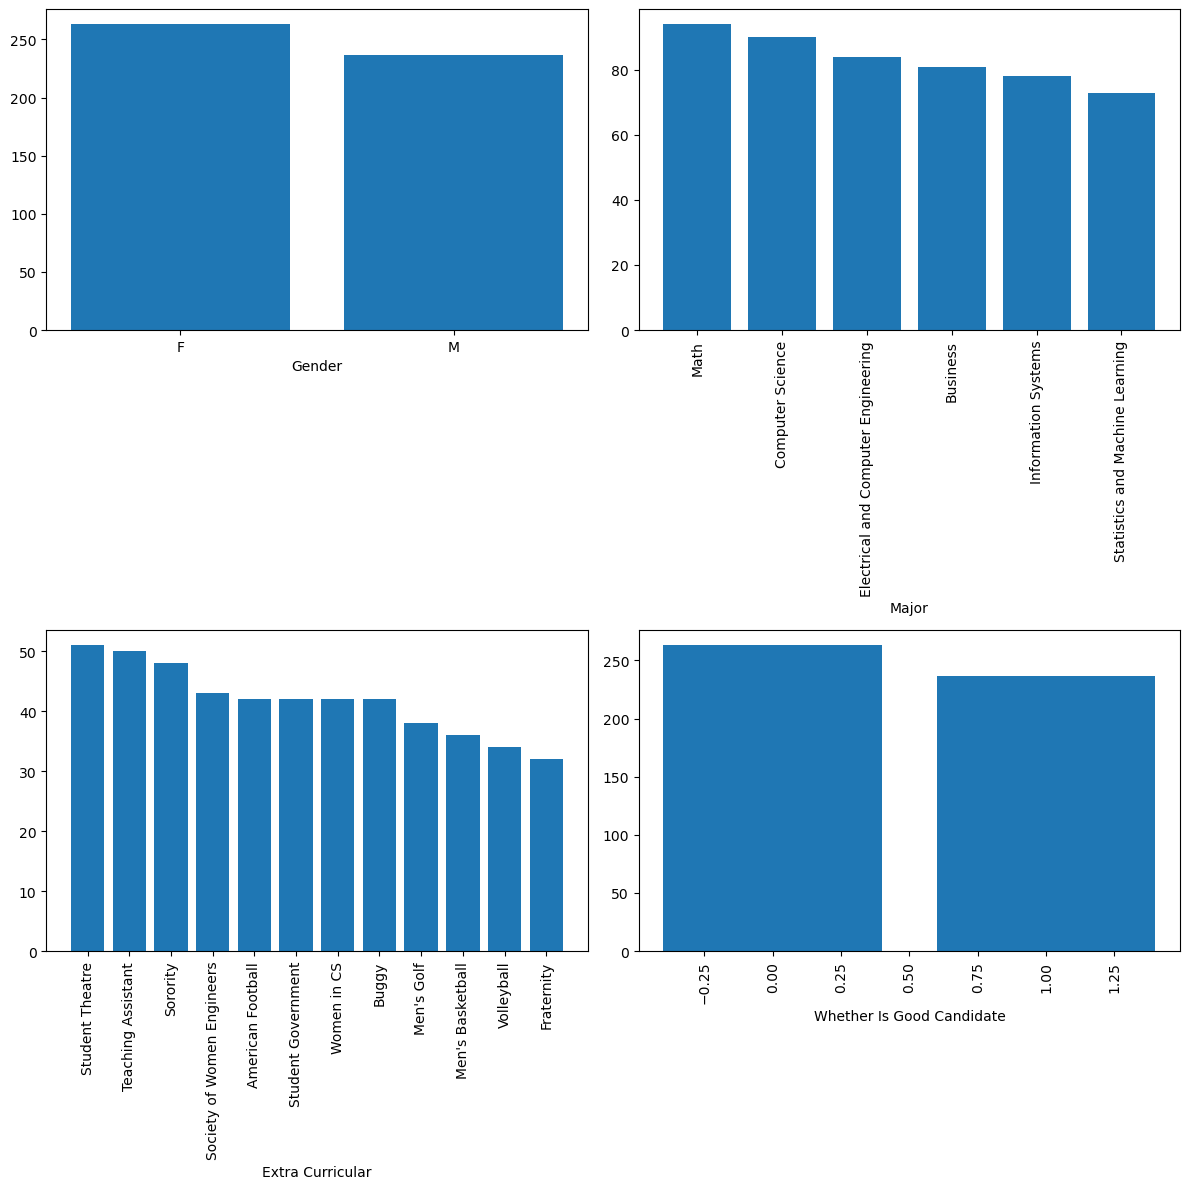

In [26]:
plt.rcParams["figure.figsize"] = [12, 12]
plt.rcParams["figure.autolayout"] = True

counts = dict(X['Gender'].value_counts())
plt.subplot(221)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Gender')

counts = dict(X['Major'].value_counts())
plt.subplot(222)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Major')
plt.xticks(rotation = 90)

counts = dict(X['Extra Curricular'].value_counts())
plt.subplot(223)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Extra Curricular')
plt.xticks(rotation = 90)

counts = dict(y["Good Candidate"].value_counts())
plt.subplot(224)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Whether Is Good Candidate')
plt.xticks(rotation = 90)

plt.show()

Below we will visualize the numeric variables: 

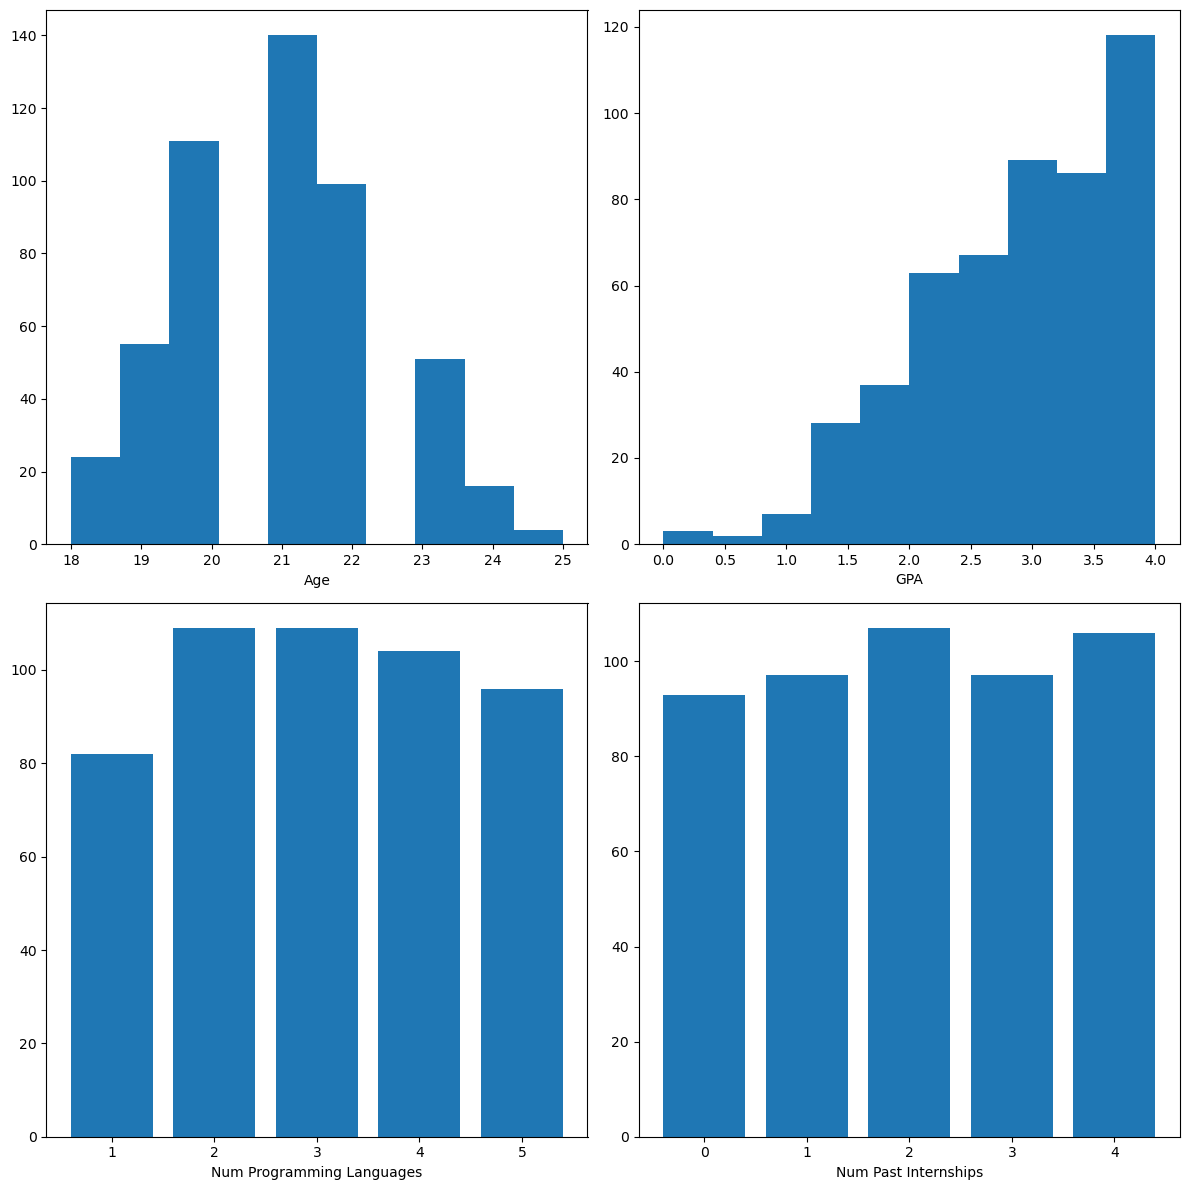

In [27]:
plt.subplot(221)
plt.hist(X['Age'])
plt.xlabel('Age')

plt.subplot(222)
plt.hist(X['GPA'])
plt.xlabel('GPA')

counts = dict(X['Num Programming Languages'].value_counts())
plt.subplot(223)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Num Programming Languages')

counts = dict(X['Num Past Internships'].value_counts())
plt.subplot(224)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Num Past Internships')


plt.show() 

In [28]:
# summary_table = pd.DataFrame(columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
summary_table = pd.DataFrame()

for col in ['Age', 'GPA', 'Num Programming Languages', 'Num Past Internships']:
    print(f"Summary stats for '{col}'")
    print(X[col].describe())
    print('===================')

    summary_table = summary_table.append(X[col].describe())

Summary stats for 'Age'
count    500.000000
mean      20.944000
std        1.455025
min       18.000000
25%       20.000000
50%       21.000000
75%       22.000000
max       25.000000
Name: Age, dtype: float64
Summary stats for 'GPA'
count    500.000000
mean       2.905780
std        0.839559
min        0.000000
25%        2.345000
50%        2.990000
75%        3.560000
max        4.000000
Name: GPA, dtype: float64
Summary stats for 'Num Programming Languages'
count    500.00000
mean       3.04600
std        1.36073
min        1.00000
25%        2.00000
50%        3.00000
75%        4.00000
max        5.00000
Name: Num Programming Languages, dtype: float64
Summary stats for 'Num Past Internships'
count    500.000000
mean       2.052000
std        1.407572
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Num Past Internships, dtype: float64


/var/folders/29/l7nrj2kj79s5n10vdwh2ywnc0000gn/T/ipykernel_2672/2230008227.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append(X[col].describe())
/var/folders/29/l7nrj2kj79s5n10vdwh2ywnc0000gn/T/ipykernel_2672/2230008227.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append(X[col].describe())
/var/folders/29/l7nrj2kj79s5n10vdwh2ywnc0000gn/T/ipykernel_2672/2230008227.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append(X[col].describe())
/var/folders/29/l7nrj2kj79s5n10vdwh2ywnc0000gn/T/ipykernel_2672/2230008227.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

In [29]:
summary_table

,count,mean,std,min,25%,50%,75%,max
Age,500.0,20.94400,1.455025,18.0,20.000,21.00,22.00,25.0
GPA,500.0,2.90578,0.839559,0.0,2.345,2.99,3.56,4.0
Num Programming Languages,500.0,3.04600,1.360730,1.0,2.000,3.00,4.00,5.0
Num Past Internships,500.0,2.05200,1.407572,0.0,1.000,2.00,3.00,4.0


Next, we will make predictions from the test dataset and evaluate the model using some metrics. 

In [ ]:
from predict import predict 
from tqdm import tqdm

# test["student_id"] = "student" + test.index

def to_dict(data_entry): 
    tmp_dict = dict(data_entry) 
    tmp_dict['student_id'] = "na" 
    return tmp_dict

test_inputs = test.apply(to_dict, axis=1)
test_inputs = list(test_inputs)

test_outputs = [ predict(input) for input in tqdm(test_inputs) ]
test_outputs = [ output['good_employee'] for output in test_outputs ] 
# test_outputs

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print("Below is confusion matrix: \n", 
      confusion_matrix(test["Good Candidate"], test_outputs))

print(classification_report(test["Good Candidate"], test_outputs))

Below is confusion matrix: 
 [[221  42]
 [ 42 195]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       263
           1       0.82      0.82      0.82       237

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Accurary and F1-score are both $0.83$. And please see the confusion matrix above. 

## Fairness Analysis 

### Demographic parity 

In [37]:
test['test_output'] = test_outputs
test.groupby('Gender').aggregate('mean')

,Age,GPA,Num Programming Languages,Num Past Internships,Good Candidate,test_output
Gender,,,,,,
F,20.946768,2.876198,2.912548,2.076046,0.460076,0.346008
M,20.940928,2.938608,3.194093,2.025316,0.489451,0.616034


So we can see from above that the model is rather biased on gender: 

    - The probability of being predicted to be a "good employee" is 0.616034 for males
    - On the other hand, the same probability is only 0.346008 for females 